# FFR120 Simulation of Complex Systems - Crowd Disasters
**Group** - Team Butterflies

**Members**:
- Artur ..
- Maria
- Nina
- Ruiqi
- Rundong .,

In [33]:
from dataclasses import dataclass
import numpy as np


@dataclass(init=True)
class State:
    positions: np.ndarray
    velocities: np.ndarray
        
    
@dataclass(init=True)
class SimConstants:
    time_inc = 0.01
    n_individuals = 100
    individual_radius = 1
    collision_rebound = 10
    mass = 10
    max_pos = 50, 50
    n_time_steps = 100
        
        
@dataclass(init=True)
class AnimationSettings:
    display_size = 8, 8   # Size of display in inches
    dpi = 100    # Pixels per inch
    bg_color = "#C336C9"
    individual_color = "#000000"
    framerate = 20
    
    def get_marker_size():
        return AnimationSettings.dpi*np.mean(AnimationSettings.display_size)/np.mean(SimConstants.max_pos)

## Simulation


In [34]:
"""Functionality related to executing the simulation and generating a history."""
import numpy as np

def run_simulation(seed: int = None) -> list[State]:
    """Run the simulation step by step and generate a history.

    Args:
        n_time_steps: Number of time steps to run the simulation.
        seed: Gives the random number generator a reproducable result.

    Returns:
        The state for each time step.
    """
    sim_const = SimConstants
    
    np.random.seed(seed)

    max_pos = np.array(sim_const.max_pos)
    zero_vectors = np.zeros(shape=(sim_const.n_individuals, 2))
    positions = np.random.rand(sim_const.n_individuals, 2)
    positions *= max_pos
    velocities = np.zeros(shape=(sim_const.n_individuals, 2))

    state = State(positions=positions, velocities=velocities)
    history = [state]

    for time_step in range(sim_const.n_time_steps):
        positions = state.positions + state.velocities*sim_const.time_inc
        forces = zero_vectors.copy()

        # TODO: Fix logic
        for individual in range(sim_const.n_individuals):

            # Compute the displacement between this individual and all others, |p_i - p_j|.
            displacements = positions - positions[individual, :]

            # The distance to each individual is the norm of each displacement |p_i - p_j|.
            distances = np.linalg.norm(displacements, axis=1)

            # Find all the collisions that occur, which is defined as the instances
            # where the distances are within 2 radiuses, since this means that each
            # perimeter is just barely touching.
            # Exclude the instances where the distance is 0, since this means that
            # the individual is being compared to itself (or something has gone terribly wrong):
            collisions = (
                (distances < 2*sim_const.individual_radius) &
                (distances > 0)
            )

            forces[collisions] += (
                sim_const.collision_rebound / displacements[collisions]
            )

        velocities = (
            state.velocities +
            forces * (sim_const.time_inc / sim_const.mass)
        )

        state = State(positions=positions, velocities=velocities)
        history.append(state)

    return history


KAH


In [35]:
history_temp = run_simulation()


## Animation

<IPython.core.display.Javascript object>


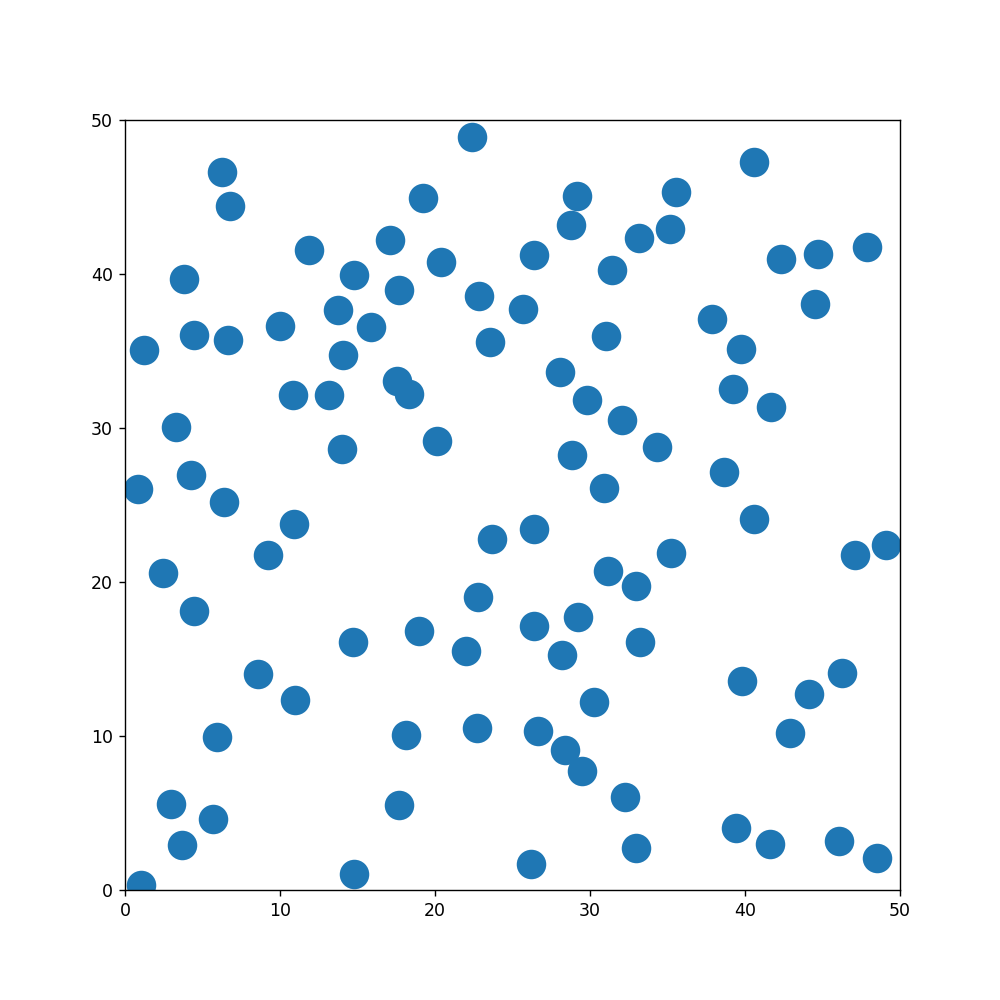

In [47]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as anim


def get_time_step(i_frame: int, frame_rate: int, time_inc: float) -> int:
    """Get the time step corresponding to actual time passed of simulation.

    Example:
        50 fps -> 0.02s per frame
        0.01 time_inc -> 2 time steps per frame
        3 frames -> 6 time_steps

    Args:
        i_frame: The frame currently being rendered:
        frame_rate: Number of frames rendered per second.
        time_inc: The time passed between time steps.
    """
    return int((i_frame / frame_rate) // time_inc)


def render_state(i_frame, history, screen):
    i_time = get_time_step(i_frame, AnimationSettings.framerate, SimConstants.time_inc)
    state = history[i_time]
    screen.set_data(state.positions[:, 0], state.positions[:, 1])
        
    print("KAH")
        
    return screen, 

def render_simulation(history: list[State]) -> None:
    """Given a finished simulation, run over each frame and simulate it in real-time.

    Args:
        history: The states of each time step.
        rendering_state. The settings of the rendering.
        sim_constants: The settings of the simulation.
    """
    fig = plt.figure(
        figsize=AnimationSettings.display_size,
        dpi=AnimationSettings.dpi
    )
    ax = fig.gca()
    screen, = ax.plot([], [], 'o', ms=AnimationSettings.get_marker_size())
    
    ax.set_xlim(0, SimConstants.max_pos[1])
    ax.set_ylim(0, SimConstants.max_pos[0])
        
    animation = anim.FuncAnimation(
        fig=fig, func=render_state, frames=len(history),
        fargs=(history, screen),
        blit=True, interval=1000//AnimationSettings.framerate
    )
    return animation
    
animation = render_simulation(history_temp)
